**IMPORT CSV**

In [30]:
import geopandas as gpd
import pandas as pd

In [31]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_ispa = pd.read_excel('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/allvar_ispa_5yo.xlsx')

In [32]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   300 non-null    int64  
 1   KABKOT       300 non-null    object 
 2   month        300 non-null    int64  
 3   year         300 non-null    int64  
 4   longitude    300 non-null    float64
 5   latitude     300 non-null    float64
 6   pm2p5        300 non-null    float64
 7   time         300 non-null    object 
 8   RH           300 non-null    float64
 9   t2m          300 non-null    float64
 10  tp           300 non-null    float64
 11  ispa         300 non-null    int64  
 12  pm10         300 non-null    float64
 13  so2          300 non-null    float64
 14  ispa_balita  300 non-null    int64  
 15  ispa_5y      300 non-null    int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 37.6+ KB


In [33]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   300 non-null    int64  
 1   KABKOT       300 non-null    object 
 2   month        300 non-null    int64  
 3   year         300 non-null    int64  
 4   longitude    300 non-null    float64
 5   latitude     300 non-null    float64
 6   pm2p5        300 non-null    float64
 7   time         300 non-null    object 
 8   RH           300 non-null    float64
 9   t2m          300 non-null    float64
 10  tp           300 non-null    float64
 11  ispa         300 non-null    int64  
 12  pm10         300 non-null    float64
 13  so2          300 non-null    float64
 14  ispa_balita  300 non-null    int64  
 15  ispa_5y      300 non-null    int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 37.6+ KB


**SET THE TIME TO .DATETIME FORMAT**

In [34]:
df_ispa.to_csv('allvar_ispa_5yo.csv')

In [35]:
df_ispa['time']= pd.to_datetime(df_ispa['time'])

In [36]:
df_ispa['month'] = df_ispa['time'].dt.month
df_ispa['year'] = df_ispa['time'].dt.year

**IMPORT SHP FILE**

In [37]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

In [38]:
gdf_shapefile.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVNO    6 non-null      object  
 1   KABKOTNO  6 non-null      object  
 2   PROVINSI  6 non-null      object  
 3   KABKOT    6 non-null      object  
 4   geometry  6 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 372.0+ bytes


**CREATE GEOMETRY FROM SHP AND CSV**

In [39]:
geometry = gpd.points_from_xy(df_ispa['longitude'], df_ispa['latitude'])
gdf_climate_ispa = gpd.GeoDataFrame(df_ispa, geometry=geometry, crs='4326')

In [40]:
gdf_climate_ispa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   300 non-null    int64         
 1   KABKOT       300 non-null    object        
 2   month        300 non-null    int32         
 3   year         300 non-null    int32         
 4   longitude    300 non-null    float64       
 5   latitude     300 non-null    float64       
 6   pm2p5        300 non-null    float64       
 7   time         300 non-null    datetime64[ns]
 8   RH           300 non-null    float64       
 9   t2m          300 non-null    float64       
 10  tp           300 non-null    float64       
 11  ispa         300 non-null    int64         
 12  pm10         300 non-null    float64       
 13  so2          300 non-null    float64       
 14  ispa_balita  300 non-null    int64         
 15  ispa_5y      300 non-null    int64         
 16  

<Axes: >

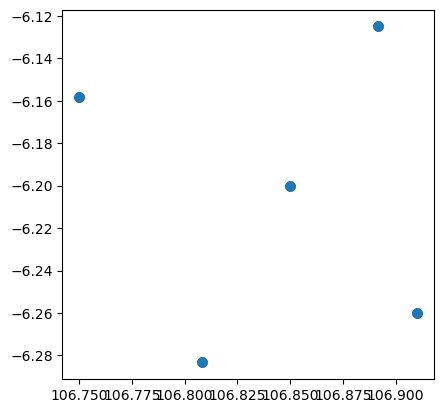

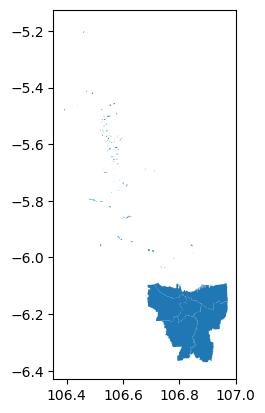

In [41]:
gdf_climate_ispa.plot()
gdf_shapefile.plot()

In [42]:
#join all the variables
result = gdf_climate_ispa.merge(gdf_shapefile, on='KABKOT')
result['geometry'] = result['geometry_y']
result = gpd.GeoDataFrame(result)
#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'ispa_5y', 'geometry', 'KABKOT','time']]
result.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   300 non-null    int64         
 1   KABKOT       300 non-null    object        
 2   month        300 non-null    int32         
 3   year         300 non-null    int32         
 4   longitude    300 non-null    float64       
 5   latitude     300 non-null    float64       
 6   pm2p5        300 non-null    float64       
 7   time         300 non-null    datetime64[ns]
 8   RH           300 non-null    float64       
 9   t2m          300 non-null    float64       
 10  tp           300 non-null    float64       
 11  ispa         300 non-null    int64         
 12  pm10         300 non-null    float64       
 13  so2          300 non-null    float64       
 14  ispa_balita  300 non-null    int64         
 15  ispa_5y      300 non-null    int64         
 16  

<Axes: >

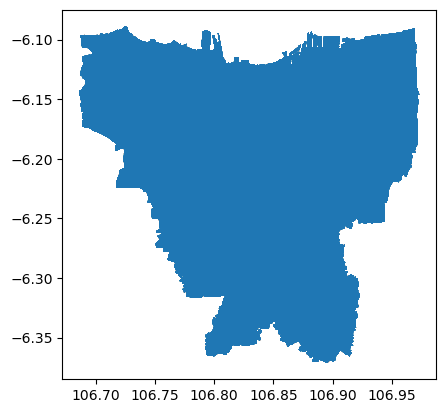

In [43]:
result_pop.plot()

In [15]:
result_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  300 non-null    float64       
 1   latitude   300 non-null    float64       
 2   month      300 non-null    int32         
 3   year       300 non-null    int32         
 4   ispa_5y    300 non-null    int64         
 5   geometry   300 non-null    geometry      
 6   KABKOT     300 non-null    object        
 7   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(1), object(1)
memory usage: 16.5+ KB


**SHOW THE COLUMNS**

In [44]:
# Dissolve berdasarkan 'KABKOT' dan 'month' dengan fungsi agregasi mean
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month', 'year'])

# Reset indeks untuk membuat kolom 'KABKOT' 'month', dan 'year' menjadi kolom
dissolved_result.reset_index(inplace=True)

In [45]:
dissolved_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   geometry   300 non-null    geometry      
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   ispa_5y    300 non-null    int64         
 7   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(1), object(1)
memory usage: 16.5+ KB


**SET FOR MAPPING**

In [46]:
# ubah per month
import pandas as pd

In [47]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [48]:
dissolved_result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   longitude  300 non-null    float64       
 4   latitude   300 non-null    float64       
 5   ispa_5y    300 non-null    int64         
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 14.2+ KB


In [49]:
dissolved_result_df = dissolved_result_df.sort_values(by=[ 'year', 'KABKOT', 'month'])

In [50]:
dissolved_result_df.reset_index()

,index,KABKOT,month,year,longitude,latitude,ispa_5y,time
0,0,JAKARTA BARAT,1,2018,106.750000,-6.158333,21514,2018-01-01
1,5,JAKARTA BARAT,2,2018,106.750000,-6.158333,23476,2018-02-01
2,10,JAKARTA BARAT,3,2018,106.750000,-6.158333,27114,2018-03-01
3,15,JAKARTA BARAT,4,2018,106.750000,-6.158333,22222,2018-04-01
4,20,JAKARTA BARAT,5,2018,106.750000,-6.158333,22691,2018-05-01
...,...,...,...,...,...,...,...,...
295,279,JAKARTA UTARA,8,2022,106.891667,-6.125000,17425,2022-08-01
296,284,JAKARTA UTARA,9,2022,106.891667,-6.125000,21946,2022-09-01
297,289,JAKARTA UTARA,10,2022,106.891667,-6.125000,22766,2022-10-01
298,294,JAKARTA UTARA,11,2022,106.891667,-6.125000,25861,2022-11-01


In [51]:
dissolved_result_df.head()

,KABKOT,month,year,longitude,latitude,ispa_5y,time
0,JAKARTA BARAT,1,2018,106.75,-6.158333,21514,2018-01-01
5,JAKARTA BARAT,2,2018,106.75,-6.158333,23476,2018-02-01
10,JAKARTA BARAT,3,2018,106.75,-6.158333,27114,2018-03-01
15,JAKARTA BARAT,4,2018,106.75,-6.158333,22222,2018-04-01
20,JAKARTA BARAT,5,2018,106.75,-6.158333,22691,2018-05-01


In [52]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT_left', 'geometry',
       'index_right', 'KABKOT_right', 'month', 'year', 'longitude', 'latitude',
       'ispa_5y', 'time'],
      dtype='object')


In [53]:
polygon_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1260 entries, 1 to 5
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PROVNO        1260 non-null   object        
 1   KABKOTNO      1260 non-null   object        
 2   PROVINSI      1260 non-null   object        
 3   KABKOT_left   1260 non-null   object        
 4   geometry      1260 non-null   geometry      
 5   index_right   1260 non-null   int64         
 6   KABKOT_right  1260 non-null   object        
 7   month         1260 non-null   int32         
 8   year          1260 non-null   int32         
 9   longitude     1260 non-null   float64       
 10  latitude      1260 non-null   float64       
 11  ispa_5y       1260 non-null   int64         
 12  time          1260 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(2), object(5)
memory usage: 128.0+ KB


**MAPPING**

In [54]:
import calendar
import matplotlib.pyplot as plt

**GRAPHS**

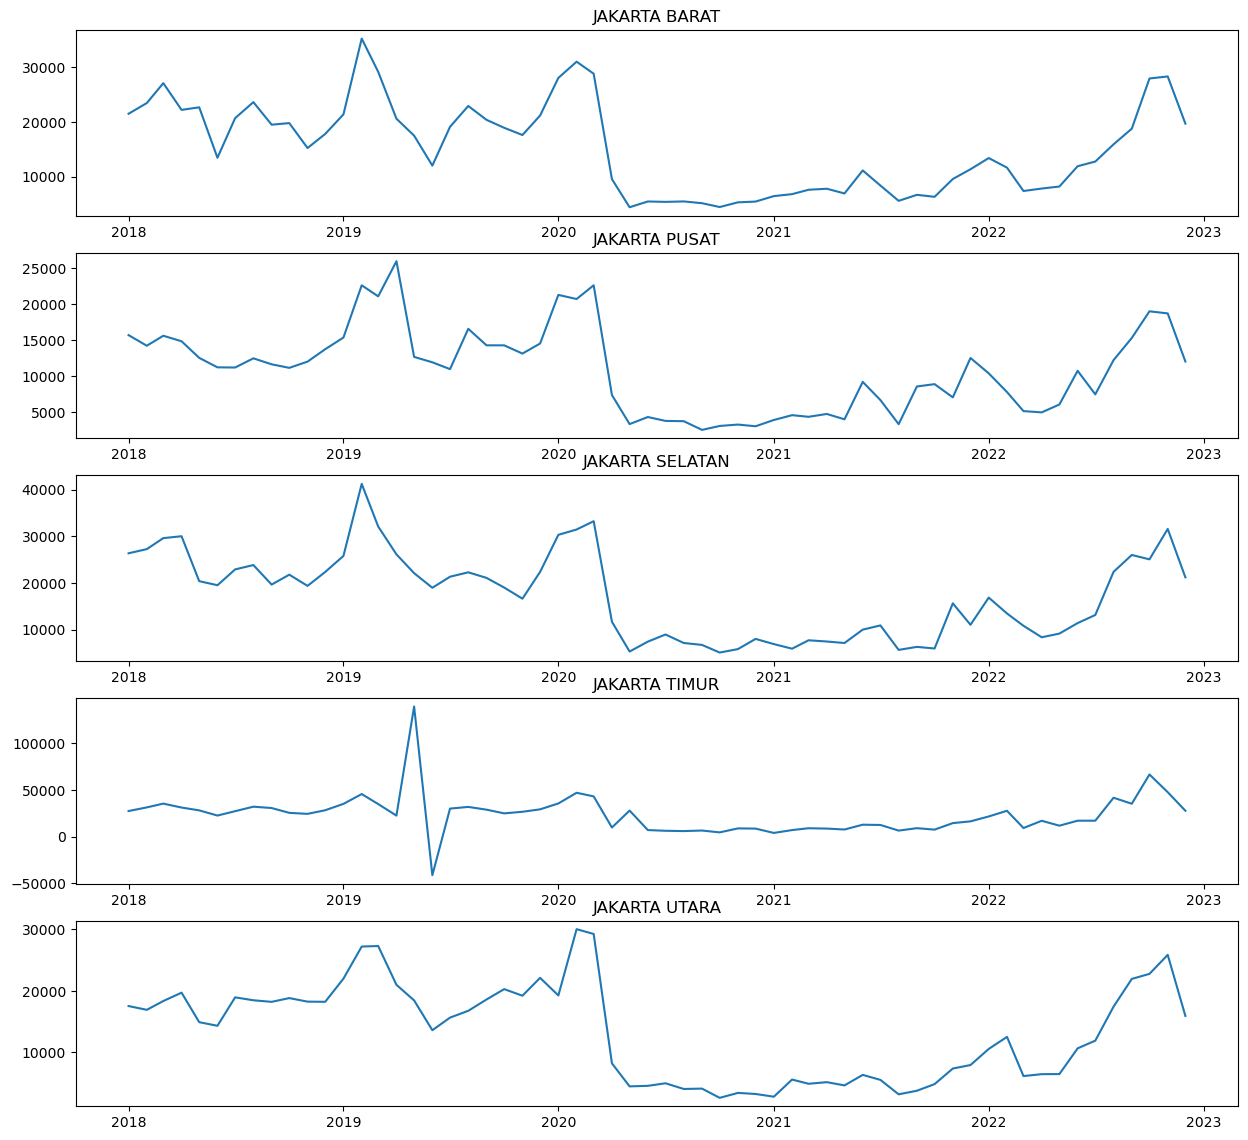

In [55]:
# There are 5 graphs, each city has 1 graph which shows time series from Jan 2018 to Dec 2022
fig  = plt.figure(figsize=(15,40))
cities = list(dissolved_result_df['KABKOT'].unique())
dissolved_result_df = dissolved_result_df.set_index('time')

# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['KABKOT'] == city]
    
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['ispa_5y'])
    plt.title(city)
    #ax.set_title(f'{city}')